<a href="https://colab.research.google.com/github/Nakulpradeep94/Time_Series_Forecasting_Energy_Power_Consumption/blob/main/Time_Series_Forecasting_Energy_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install setuptools --upgrade
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 71.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826063 sha256=a123b7582200f43462a0ffe0c280ccb2861fc4a2c4f0f0036c7a8cb883a62fcc
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.7.0
    Uninstalling pystan-3.7.0:
      Successfully uninstalled pystan-3.7.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbp

In [4]:
pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [6]:
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825797 sha256=2d9064a61500e6e9570b01f6cea7f246a79e21b5b236cb5e06adb51f7ded2eb3
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.7.0
    Uninstalling pystan-3.7.0:
      Successfully uninstalled pystan-3.7.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436911 sha256=53fbe85629ca26fdb638407a52e900cf79255f09b39335736

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# importing prophet from fb
from fbprophet import Prophet

# importing metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [11]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ALMABETTER/Capstone/AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [12]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


Since it is a time series it is better to convert date to index  and convert object typeto datetime


In [13]:
# converting type to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])
# setting datetime as index
df.set_index('Datetime', inplace=True)

In [14]:
#checking null values
df.isnull().sum()

AEP_MW    0
dtype: int64

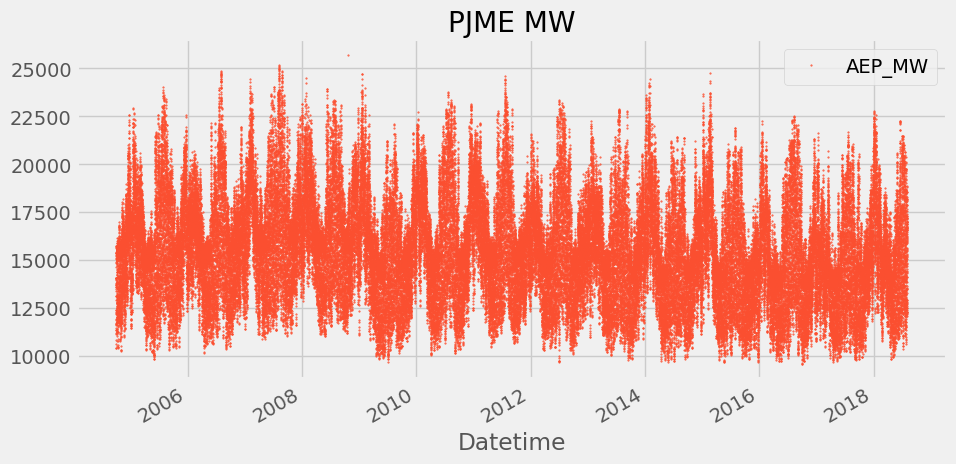

In [15]:
# plot to see how the energy consumption looks like
color_pal = sns.color_palette()
df.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[1],
          title='PJME MW')
plt.show()

Creating time series features (remember you dont need this for prophet model  however we can use it to see how the data looks like)


In [16]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], 
                          labels=['Spring', 'Summer', 'Fall', 'Winter']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(df, label='AEP_MW')
features_and_target = pd.concat([X, y], axis=1)

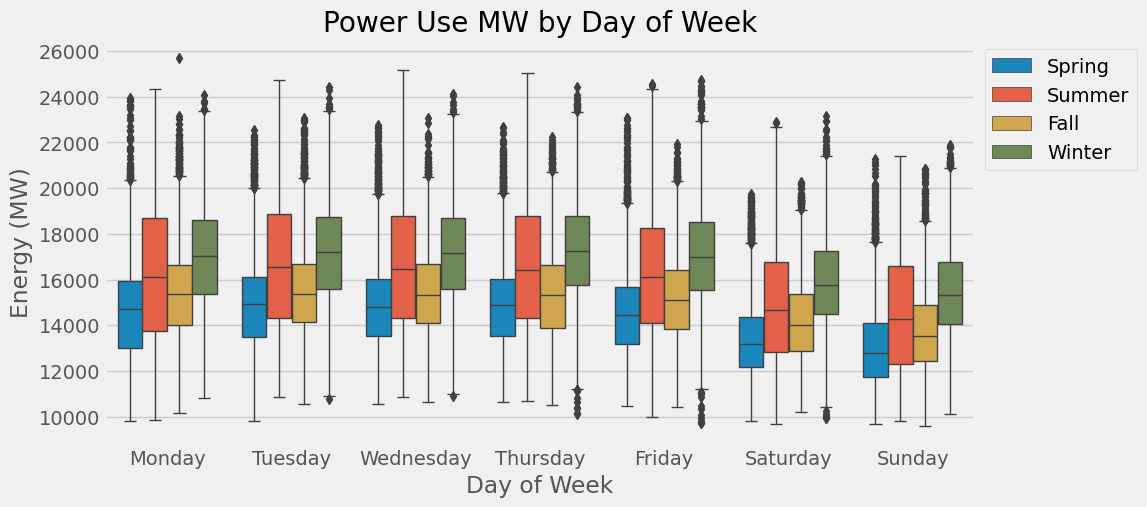

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=features_and_target.dropna(),
            x='weekday',
            y='AEP_MW',
            hue='season',
            ax=ax,
            linewidth=1)
ax.set_title('Power Use MW by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Energy (MW)')
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

Day of week and seaons are showing and imp relation in this dataset.
Note that power consumption is higher during winter and summer. 

# Train/Test

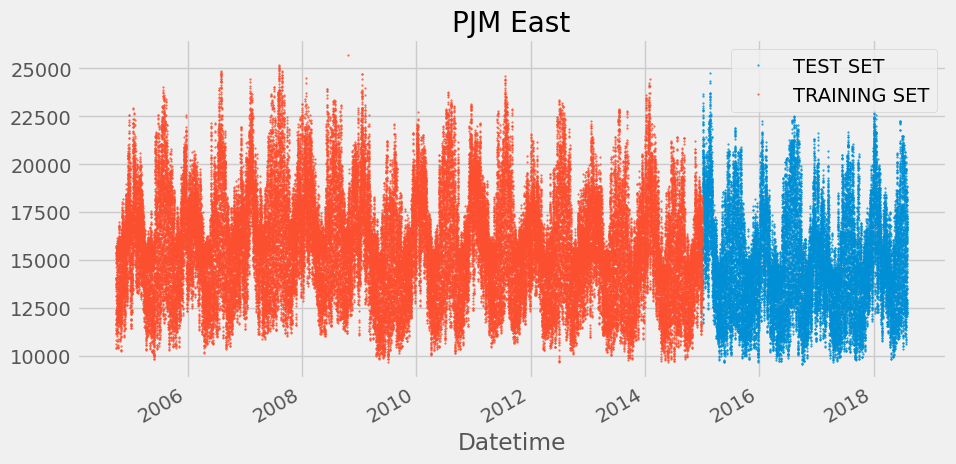

In [18]:
split_date = '1-Jan-2015'
pjme_train = df.loc[df.index <= split_date].copy()
pjme_test = df.loc[df.index > split_date].copy()

# Plot train and test so you can see where we have split
pjme_test \
    .rename(columns={'AEP_MW': 'TEST SET'}) \
    .join(pjme_train.rename(columns={'AEP_MW': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(10, 5), title='PJM East', style='.', ms=1)
plt.show()

In [19]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


#Simple Prophet Model
Prophet model expects the dataset to be named a specific way. We will rename our dataframe columns before feeding it into the model.
* Datetime column named: ds
* target : y

In [20]:
# Format data for prophet model using ds and y
pjme_train_prophet = pjme_train.reset_index().rename(columns={'Datetime':'ds','AEP_MW':'y'})

In [32]:
pjme_train_prophet.head()

,ds,y
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [30]:
#%%time
#model = Prophet()
#model.fit(pjme_train_prophet)

TypeError: ignored

In [34]:
import time
start_time = time.time()
# your code here
end_time = time.time()
print("Execution time:", end_time - start_time)

Execution time: 4.1484832763671875e-05


In [36]:
import fbprophet as Prophet
#%%time
model =  Prophet.Prophet(weekly_seasonality= True)
model.fit(pjme_train_prophet)

In [37]:
# Predict on test set with model
pjme_test_prophet = pjme_test.reset_index() \
    .rename(columns={'Datetime':'ds',
                     'PJME_MW':'y'})

pjme_test_fcst = model.predict(pjme_test_prophet)

In [40]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,15020.810086,12744.129202,16639.685444,15020.810086,15020.810086,-317.260608,-317.260608,-317.260608,-1526.622258,...,601.317080,601.317080,601.317080,608.044570,608.044570,608.044570,0.0,0.0,0.0,14703.549478
1,2015-01-01 02:00:00,15020.794231,12121.562467,15877.637066,15020.794231,15020.794231,-911.964260,-911.964260,-911.964260,-2123.363760,...,602.304651,602.304651,602.304651,609.094850,609.094850,609.094850,0.0,0.0,0.0,14108.829971
2,2015-01-01 03:00:00,15020.778376,11824.856033,15772.511220,15020.778376,15020.778376,-1253.151439,-1253.151439,-1253.151439,-2465.929797,...,602.605786,602.605786,602.605786,610.172572,610.172572,610.172572,0.0,0.0,0.0,13767.626937
3,2015-01-01 04:00:00,15020.762521,11854.740988,15488.219849,15020.762521,15020.762521,-1291.391562,-1291.391562,-1291.391562,-2504.896526,...,602.227230,602.227230,602.227230,611.277734,611.277734,611.277734,0.0,0.0,0.0,13729.370959
4,2015-01-01 05:00:00,15020.746666,12191.289360,15872.073309,15020.746666,15020.746666,-994.539933,-994.539933,-994.539933,-2208.134023,...,601.183760,601.183760,601.183760,612.410330,612.410330,612.410330,0.0,0.0,0.0,14026.206733


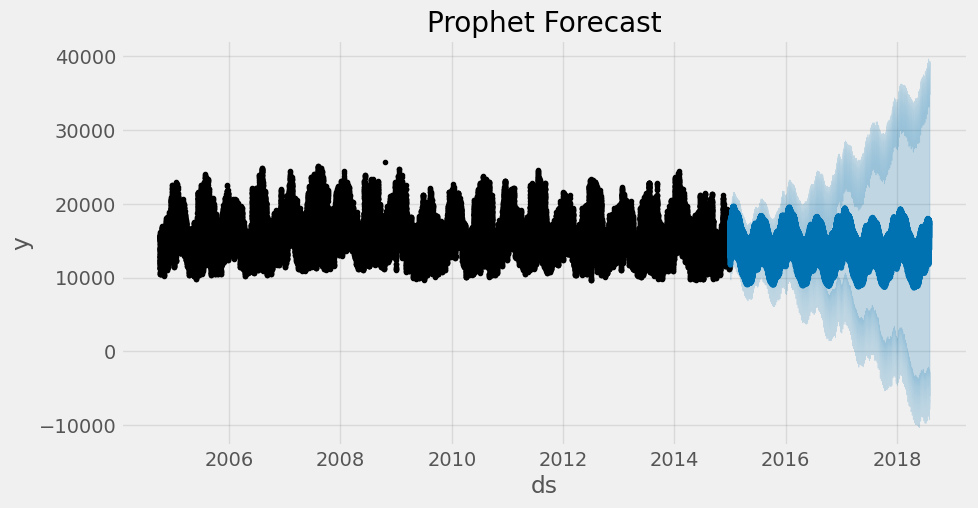

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

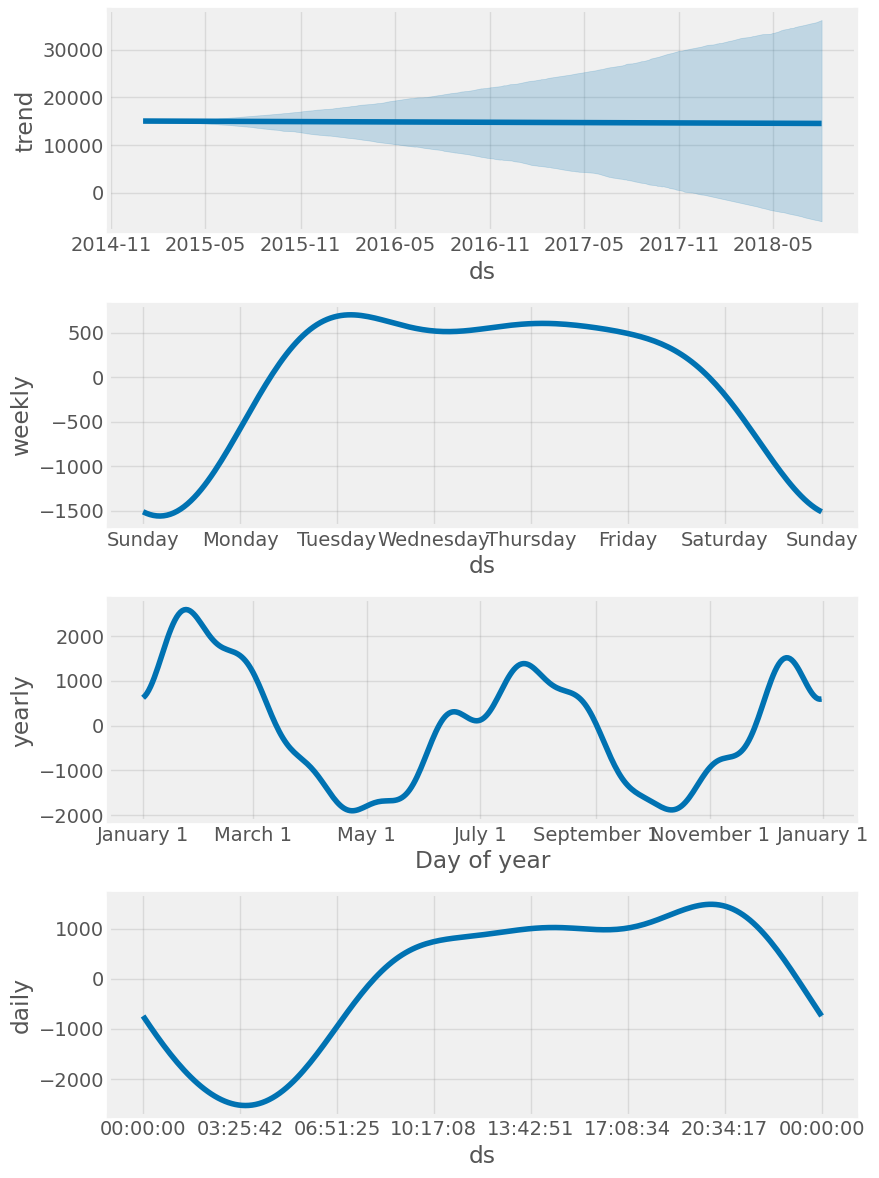

In [41]:
#s used to plot the individual components of the time series forecast.
#It shows the trend, weekly and yearly seasonality, and the holidays (if any) that were specified in the model.
fig = model.plot_components(pjme_test_fcst)
plt.show()

# Comparison of forecast to actual

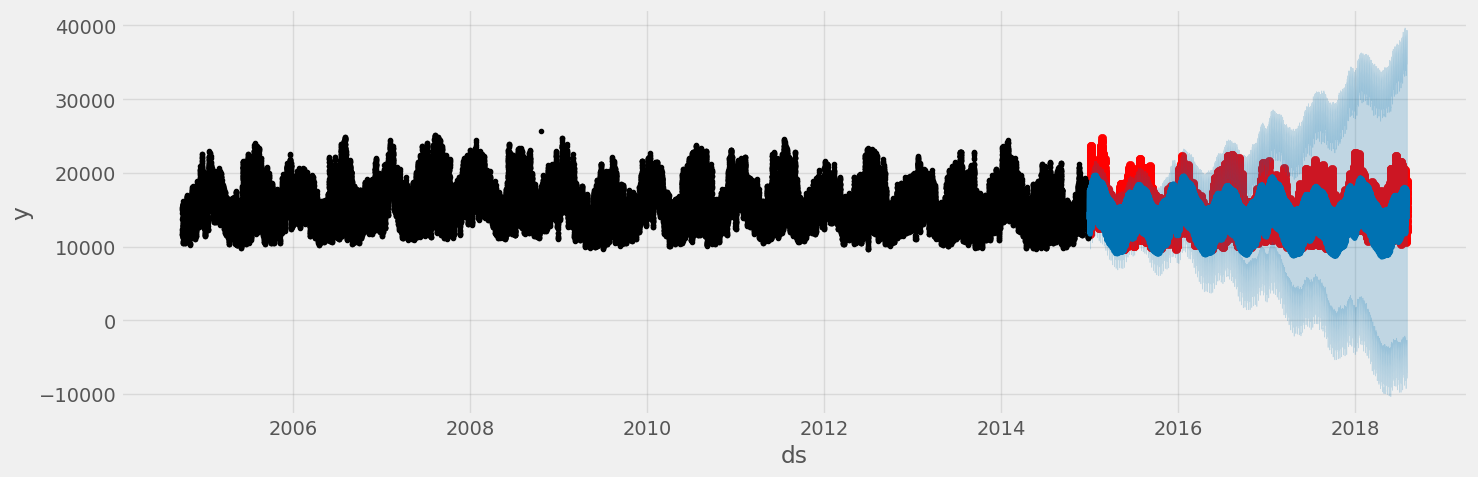

In [43]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(pjme_test.index, pjme_test['AEP_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

we can see that our model blue is taking a bit of downward trend compared to that of the actual value (it is overfitting to downward  trend)

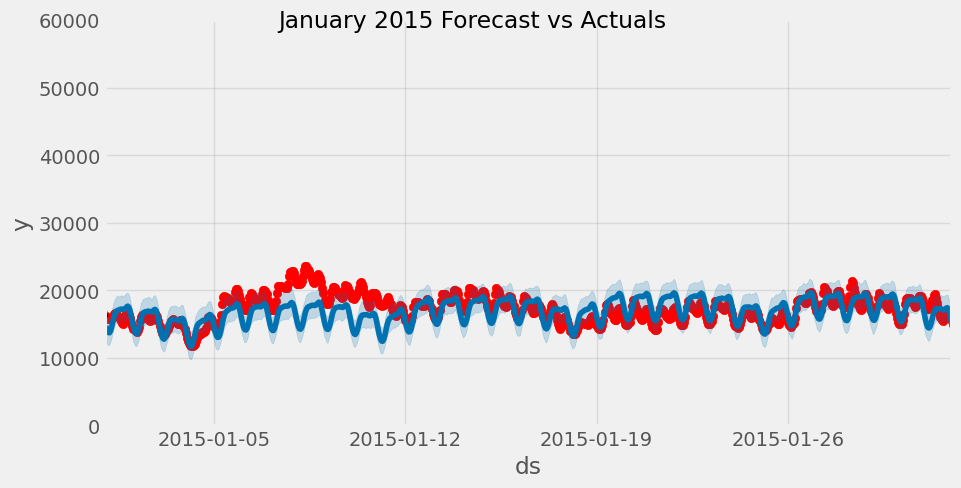

In [47]:
# checking the prediction and actual value of first month of test
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['AEP_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=pd.to_datetime('01-01-2015'),
              upper=pd.to_datetime('02-01-2015'))
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')

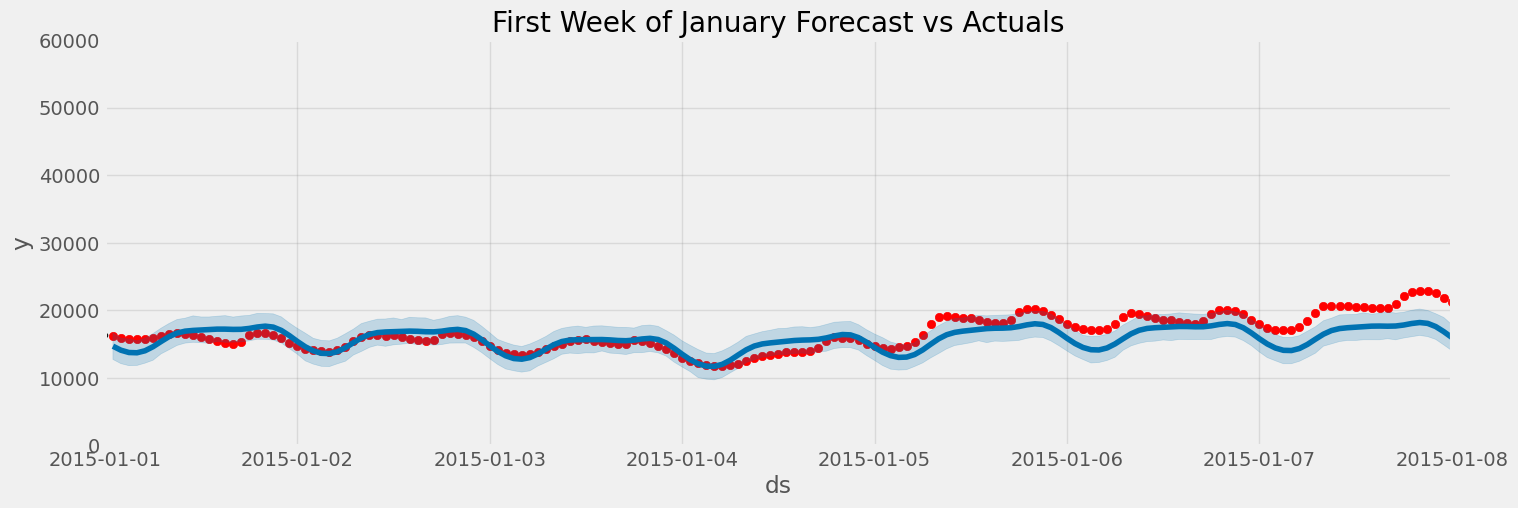

In [50]:
# Plot the forecast with the actuals  (for the first week)
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(pjme_test.index, pjme_test['AEP_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=pd.to_datetime('01-01-2015'), upper=pd.to_datetime('01-08-2015'))
ax.set_ylim(0, 60000)
ax.set_title('First Week of January Forecast vs Actuals')
plt.show()

So from figure we can see that model is working pretty well for the first week and month

#Evaluating the model with error metrics

In [52]:
#root mean sqquare error
np.sqrt(mean_squared_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst['yhat']))

2605.2676234976934

In [53]:
mean_absolute_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst['yhat'])

2081.7935169676707

In [54]:
mean_absolute_percentage_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst['yhat'])

14.175893483887842

we can see that error percent is 14 percent considering the fact that we are prediting such far out values in the future

#Adding Holidays
Next we will see if adding holiday indicators will help the accuracy of the model. Prophet comes with a Holiday Effects parameter that can be provided to the model prior to training.

We will use the built in pandas USFederalHolidayCalendar to pull the list of holidays

In [55]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()


holidays = cal.holidays(start=df.index.min(),
                        end=df.index.max(),
                        return_name=True)
holiday_df = pd.DataFrame(data=holidays,
                          columns=['holiday'])
holiday_df = holiday_df.reset_index().rename(columns={'index':'ds'})

In [57]:
%%time
model_with_holidays = Prophet.Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train_prophet)

CPU times: user 4min 47s, sys: 2.5 s, total: 4min 49s
Wall time: 4min 55s


In [58]:
# Predict on training set with model
pjme_test_fcst_with_hols = \
    model_with_holidays.predict(df=pjme_test_prophet)

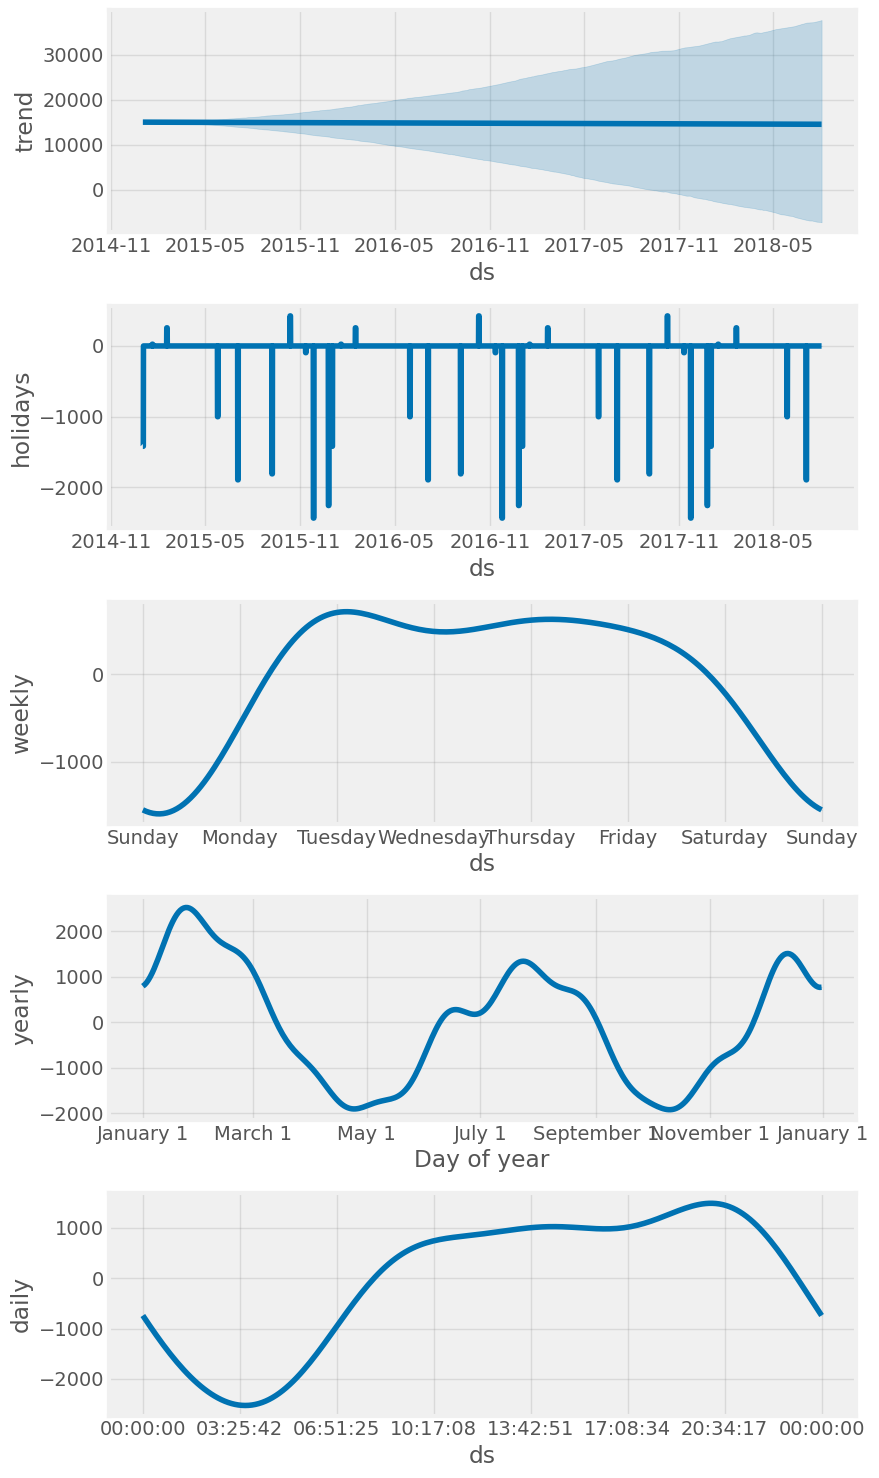

In [59]:
fig = model_with_holidays.plot_components(
    pjme_test_fcst_with_hols)
plt.show()

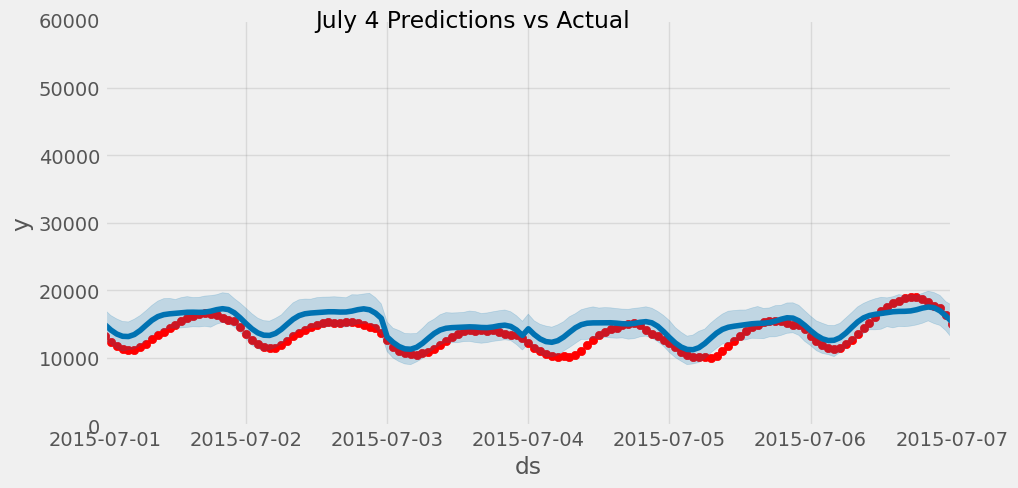

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(pjme_test.index, pjme_test['AEP_MW'], color='r')
fig = model.plot(pjme_test_fcst_with_hols, ax=ax)
ax.set_xbound(lower=pd.to_datetime('07-01-2015'),
              upper=pd.to_datetime('07-07-2015'))
ax.set_ylim(0, 60000)
plot = plt.suptitle('July 4 Predictions vs Actual')

In [64]:
np.sqrt(mean_squared_error(y_true=pjme_test['AEP_MW'],y_pred=pjme_test_fcst_with_hols['yhat']))

2619.6609324672677

In [65]:
mean_absolute_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

2093.6004750993593

In [67]:
mean_absolute_percentage_error(y_true=pjme_test['AEP_MW'],
                   y_pred=pjme_test_fcst_with_hols['yhat'])

14.271661858666093

# Predict into the Future
We can use the built in make_future_dataframe method to build our future dataframe and make predictions.

In [68]:
future = model.make_future_dataframe(periods=365*24, freq='h', include_history=False)
forecast = model_with_holidays.predict(future)

In [69]:
forecast[['ds','yhat']].head()

,ds,yhat
0,2015-01-01 01:00:00,13513.144907
1,2015-01-01 02:00:00,12920.017967
2,2015-01-01 03:00:00,12580.272089
3,2015-01-01 04:00:00,12543.357548
4,2015-01-01 05:00:00,12841.388979


In [70]:
forecast[['ds','yhat']]

,ds,yhat
0,2015-01-01 01:00:00,13513.144907
1,2015-01-01 02:00:00,12920.017967
2,2015-01-01 03:00:00,12580.272089
3,2015-01-01 04:00:00,12543.357548
4,2015-01-01 05:00:00,12841.388979
...,...,...
8755,2015-12-31 20:00:00,17740.426320
8756,2015-12-31 21:00:00,17598.614214
8757,2015-12-31 22:00:00,17108.627463
8758,2015-12-31 23:00:00,16342.207006
